<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-sampling-distributions?scriptVersionId=134656369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Sampling Distributions Dance Party Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/23/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This notebook goes over the analysis of the distributions of music that would be played at a future dance party. In this scenario, I go through the dance party Spotify songs to see which 30 songs (sample) would best fit with the dance party. Using the knowledge of probabilities ranging from Central Limit Theorem to Cumulative Density Function, I will be analyzing and sampleset the dataset to infer about the 30 songs that can be used in the future dance party. 

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Vision and Goals for this Project](#2.-Vision-and-Goals-for-this-Project)
3. [Create Functions Needed for This Project](#3.-Create-Functions-Needed-for-This-Project)
4. [Perform Extraction Transformation and Loading of the Spotify Playlist Dataset (ETL)](#4.-Perform-Extraction,-Transformation-and-Loading-of-the-Spotify-Playlist-Dataset-(ETL))
5. [Exploration Data Analysis](#5.-Exploration-Data-Analysis)
6. [Summary](#Summary)

## 1. Introduction ##

This project goes through the process of obtaining sample of the 30 songs to play at the next dance party to best get the party going through distributions and data analysis. 

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv
/kaggle/input/dataset-of-songs-in-spotify/playlists.csv


## 2. Vision and Goals for this Project ##

This section goes over the goals that needed to be done to reach the best possible songs to play at the dance party to attract people to my dance party.

**Vision:** To pick the 30 songs randomly based on distributions of songs from the dance playlist on Spotify for the dance party. 

**Goals:**
1. Create the functions needed to analyze the distributions of the songs needed to be played at the party. 
2. Ensure that the data of the playlist gets imported properly from the Kaggle Spotify test dataset. 
3. Stage and prepare the dataset for sub-setting the dataset into smaller datasets of the songs for distributions and probabilities analysis. 
4. Review the sampled data and use statiscal inference to understand what 30 songs are best for the party in the future. 

## 3. Create Functions Needed for This Project ##

Create three functions needed to be used in the distributions and data analysis of the Spotify playlist datasets. 

In [49]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')
    
def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()
    
def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

 ## 4. Perform Extraction, Transformation and Loading of the Spotify Playlist Dataset (ETL) ##

In this section, I perform the loading of the Spotify dataset, down sampling the dataset (subsetting) and transform the data for data exploration and probabilities analysis. 

1. Load the Spotify dataset (raw) into this notebook and print only the first five lines. 

In [21]:
spotify_data = pd.read_csv('/kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv',low_memory=False)
spotify_data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


2. Remove the columns and only select the following columns needed to clean the dataset further; **tempo, danceability, energy, instrumentalness, liveness and valence**. 

In [22]:
#View the columns and their datatypes. 
spotify_data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [27]:
#Drop everything except for tempo, danceability, energy, instrumentalness, liveness and valence. 
spotify_data.drop(spotify_data.columns.difference(['tempo', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']), axis=1, inplace=True)

#View the updated dataframe, spotify_data below. 
spotify_data.dtypes

danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

3. Print out the updated **spotify_data** dataframe with only 6 columns. 

In [28]:
spotify_data.head(5)

,danceability,energy,instrumentalness,liveness,valence,tempo
0,0.831,0.814,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,0.000000,0.1660,0.5910,147.988


4. Create a variable called **song_tempos** that contains the **tempo** column data from the **spotify_data** dataframe. 

In [37]:
song_tempos = spotify_data['tempo']

#Print the first five rows. 
song_tempos.head(5)

0    156.985
1    115.080
2    218.050
3    186.948
4    147.988
Name: tempo, dtype: float64

## 5. Exploration Data Analysis ##

This section goes through the **subset** of the **spotify_data** dataframe to understand the distributions of the songs for the dance party. 

1. Use the predefined function that was completed above in the function section for the song_tempo as the input. 

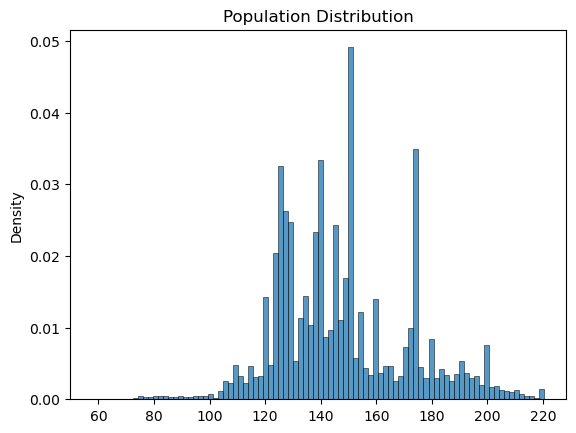

<Figure size 640x480 with 0 Axes>

In [53]:
population_distribution(song_tempos) #Plot the population distribution of the various songs across the chart. 

2. Perform the distrubtion of songs using the **sampling_distribution()** function using the **song_tempos** as the input and use 30 as the songs sample size and find the mean (mu) of the dataset songs_tempo. 

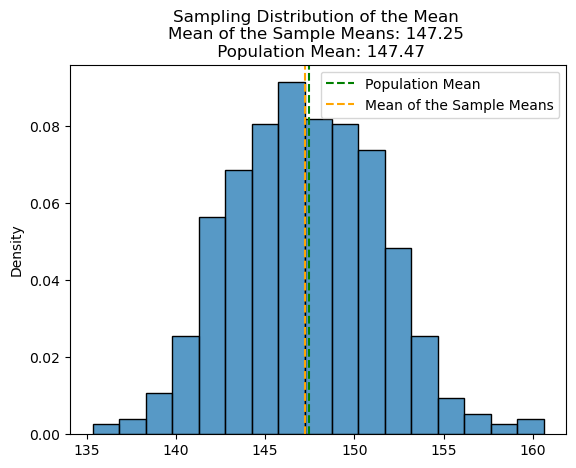

<Figure size 640x480 with 0 Axes>

In [52]:
sampling_distribution(song_tempos, 30, 'Mean')

**Summary:** The two chart shows the distributions without the sampling distribution and the sampling distribution shows the mean of the population mean being the unbiased indicator since it always approx the same as the population mean. 

3. Now, perform a sampling distribution using the **sample_distribution** function using the **Minimum** stats instead of the **Mean** stat like before with the sample size of **30**. 

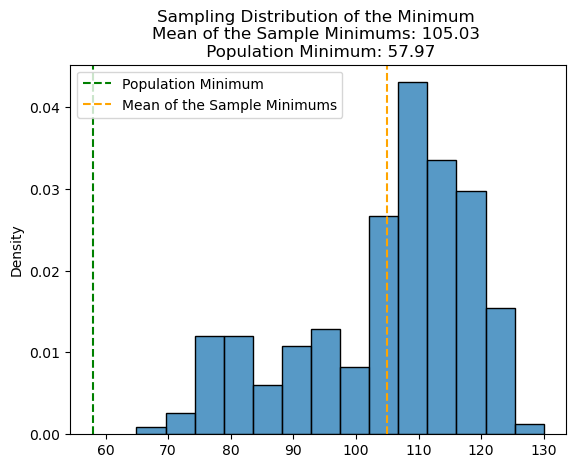

<Figure size 640x480 with 0 Axes>

In [51]:
sampling_distribution(song_tempos, 30, 'Minimum')

**Summary:** The mean of the **sample minimums** is consistently **higher** than the **population minimum**. Since the above sampling minimum chart shows higher tempo songs, those songs are good candidates for the songs for the party! Based on the information, the minimum is a bias indicator of the chart. 

4. Next, perform a sampling distribution of the sample size of 30 from the **song_tempos** sub-dataset and use the **Variance** stats in the function to get the sample variance chart. 

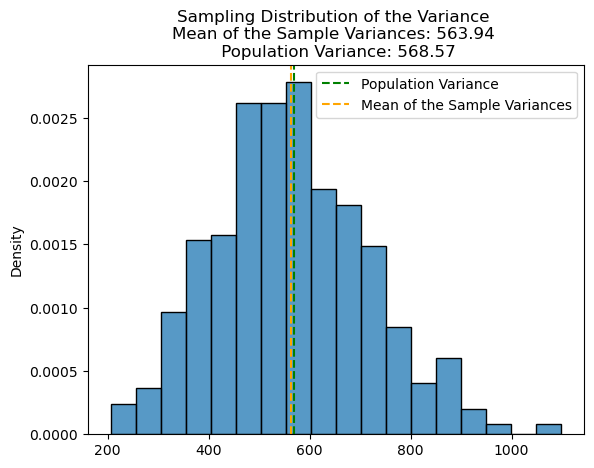

<Figure size 640x480 with 0 Axes>

In [50]:
sampling_distribution(song_tempos, 30, 'Variance')

**Summary:** Based on the chart above with the variance data, the mean of the sample variance is consistently slighlty less than the population variance. The sample variance do not have a bias indicator. 

5. Calculate the population mean and standard deviation of the song_tempos dataset. 

In [56]:
population_mean = np.mean(song_tempos)
print(f"The population mean is {population_mean}.")

population_std = np.std(song_tempos)
print(f"The standard deviation is {population_std}.")

The population mean is 147.4740559035575.
The standard deviation is 23.84434149567985.


6. Calculate the standard error (SE) of the songs_tempos dataset. 

In [59]:
standard_error = population_std/(30**.5) #MDivide the population STD over the multiplication of 30 expected songs to .5 error. 
print(f"The standard error is {standard_error}.")

The standard error is 4.3533612353467745.


7. Use the **population_mean** and **standard_error** variables in the Contineous Density Function (CDF) to calculate the probability that the sample mean of 30 selected songs is less than **140bpm**.

In [63]:
prob_avg_140bps = '{:.2f}'.format(stats.norm.cdf(140, population_mean, standard_error) * 100)
print(f"The probability of selecting 30 songs less than 140 beats per minute (bpm) is {prob_avg_140bps}%.")

The probability of selecting 30 songs less than 140 beats per minute (bpm) is 4.30%.


8. Calculate the probability of observing an average tempo of 150 beats per minute (bpm) or higher from a sample of 30 selected songs. 

In [65]:
prob_150bps = '{:.2f}'.format((1-stats.norm.cdf(150, population_mean, standard_error))*100)

print(f"The probability of selecting 30 songs with more than 150 beats per minute (bpm) or more is {prob_150bps}%.")

The probability of selecting 30 songs with more than 150 beats per minute (bpm) or more is 28.09%.


 ## Summary ##

In this notebook, I have reviewed the sub-dataset of the **spotify_data** to understand the distributions and the likely probabilities of getting a certain beats per minutes of 30 randomly selected songs for the dance party. 